# 作业6：图像线性与非线性滤波

In [3]:
import numpy as np
from skimage import io, exposure, color
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
%matplotlib inline

### 根据浮雕效果的实现原理（线性滤波），用PYTHON实现浮雕效果
- 首先，将彩色图像分解为三个独立的通道：红色（R）、绿色（G）和蓝色（B）。
- 利用卷积操作通过在图像的每个像素及其邻域上应用一个小的矩阵（称为卷积核或算子）来计算新的像素值。
- 水平方向的卷积核（h_kernel）检测图像中的水平变化，增强图像中的水平边缘。类似地，垂直方向的卷积核（v_kernel）用于检测图像中的垂直边缘。
- 卷积算子通常设计为**包含正负值，以突出像素值的差异**：正值和负值的组合可以增强边缘处的强度对比，模仿浮雕的视觉效果。水平卷积核和垂直卷积核分别检测图像中不同方向的梯度（变化率）。最后要对两组效果进行叠加。
> 下面的两组算子，后面一组类似于sobel算子，对边缘划分的更加清晰

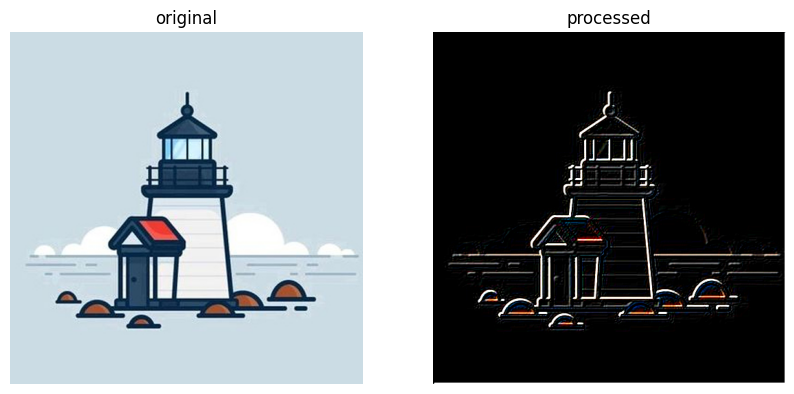

In [9]:
img = io.imread('tower.jpg')
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
# 垂直方向算子
# h_kernel = np.array([[1,0,-1],
#                    [4,0,-4],
#                    [1,0,-1]])

# v_kernel = np.array([[4,1,0],
#                      [1,0,-1],
#                      [0,-1,-4]])

# 这一组类似于sobel算子，边缘划分比较清晰
h_kernel = np.array([[ -1, 0, 1],
                     [ -1, 0, 1],
                     [ -1, 0, 1]])
v_kernel = np.array([[ -1, -1, -1],
                     [ 0,  0,  0],
                     [ 1,  1,  1]])

R_embossed = convolve2d(R,h_kernel) + convolve2d(R,v_kernel)
G_embossed = convolve2d(G,h_kernel) + convolve2d(G,v_kernel)
B_embossed = convolve2d(B,h_kernel) + convolve2d(B,v_kernel)

# 限制范围
R_embossed = np.clip(R_embossed, 0, 255)
G_embossed = np.clip(G_embossed, 0, 255)
B_embossed = np.clip(B_embossed, 0, 255)

embossed_image = np.stack([R_embossed, G_embossed, B_embossed], axis=2).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title("original")

plt.subplot(1, 2, 2)
plt.imshow(embossed_image)
plt.axis('off')
plt.title("processed")

plt.show()

### 油画效果的实现原理（非线性滤波），用PYTHON实现彩色图像的油画效果

- 遍历图像的每个像素，取其周围 4×4 范围内的灰度值，按8个等级进行量化。
- 统计每个等级的像素个数，并选择最多的等级.
- 最后将该等级内的平均颜色值作为像素值，以达到类似油画的粗糙效果。

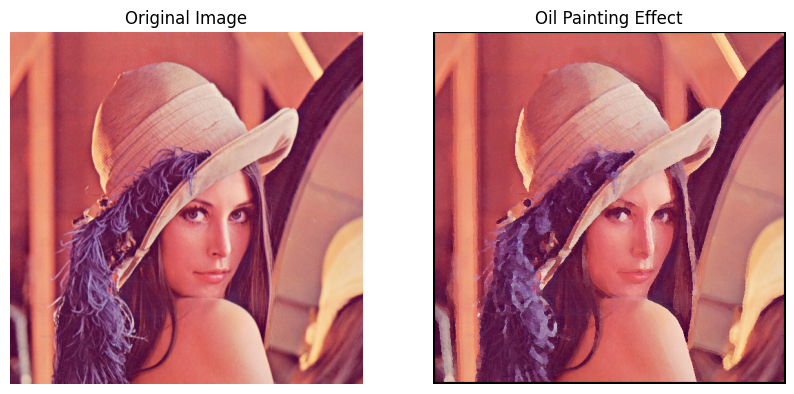

In [8]:
import cv2

img = cv2.imread('lenna.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 转为灰度图
height, width = gray.shape
dst = np.zeros((height, width, 3), np.uint8)  # 创建和原图相同大小的零矩阵

# 遍历每个像素点
for i in range(3, height - 3):
    for j in range(3, width - 3):
        # 创建一个数组记录8个量化等级的像素点个数
        array1 = np.zeros(8, np.uint8)
        for m in range(-3, 3):
            for n in range(-3, 3):
                p1 = int(gray[i + m, j + n] / 32)  # 量化操作
                array1[p1] += 1

        # 找到数量最多的像素等级
        currentMax = array1[0]
        l = 0
        for k in range(0, 8):
            if currentMax < array1[k]:
                currentMax = array1[k]
                l = k

        # 计算数量最多等级的像素平均值
        for m in range(-3, 3):
            for n in range(-3, 3):
                if (l * 32) <= gray[i + m, j + n] <= ((l + 1) * 32):
                    (b, g, r) = img[i + m, j + n]
                    break
        dst[i, j] = (b, g, r)

# 转换为RGB格式用于展示
dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dst_rgb)
plt.title('Oil Painting Effect')
plt.axis('off')

plt.show()
